
Max Eaten Trees:
13


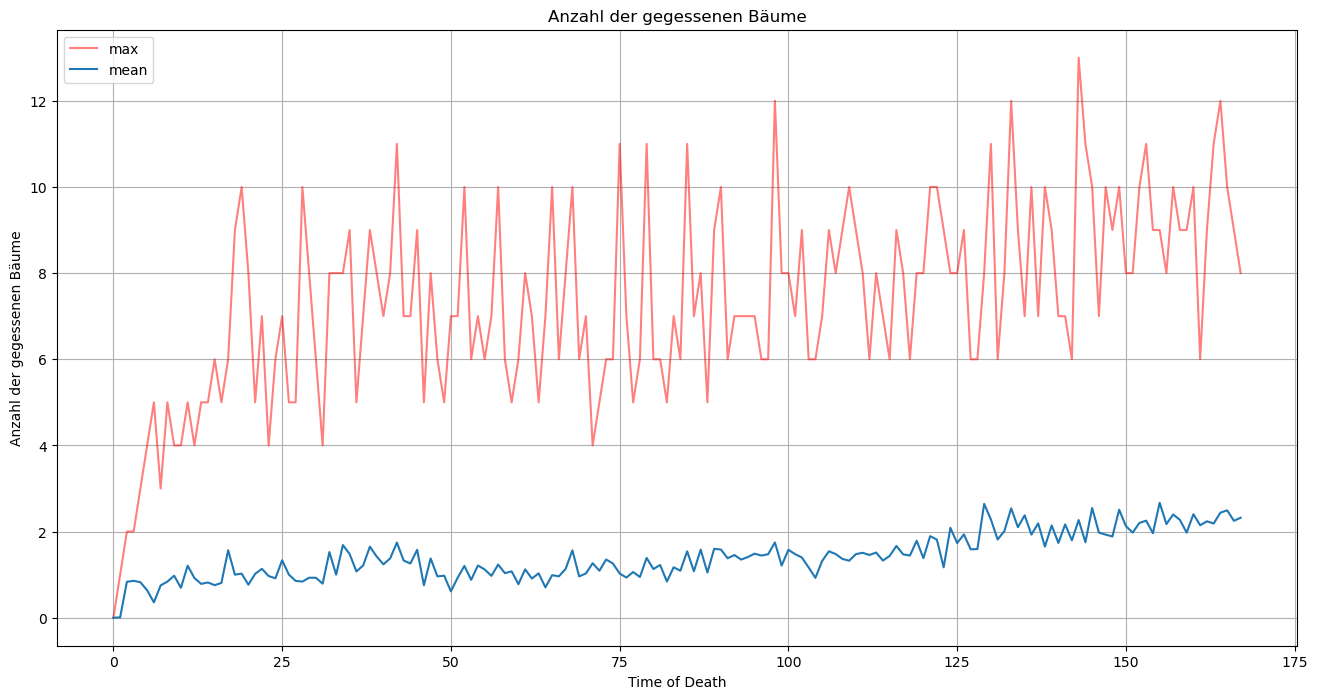

<function matplotlib.pyplot.show(close=None, block=None)>

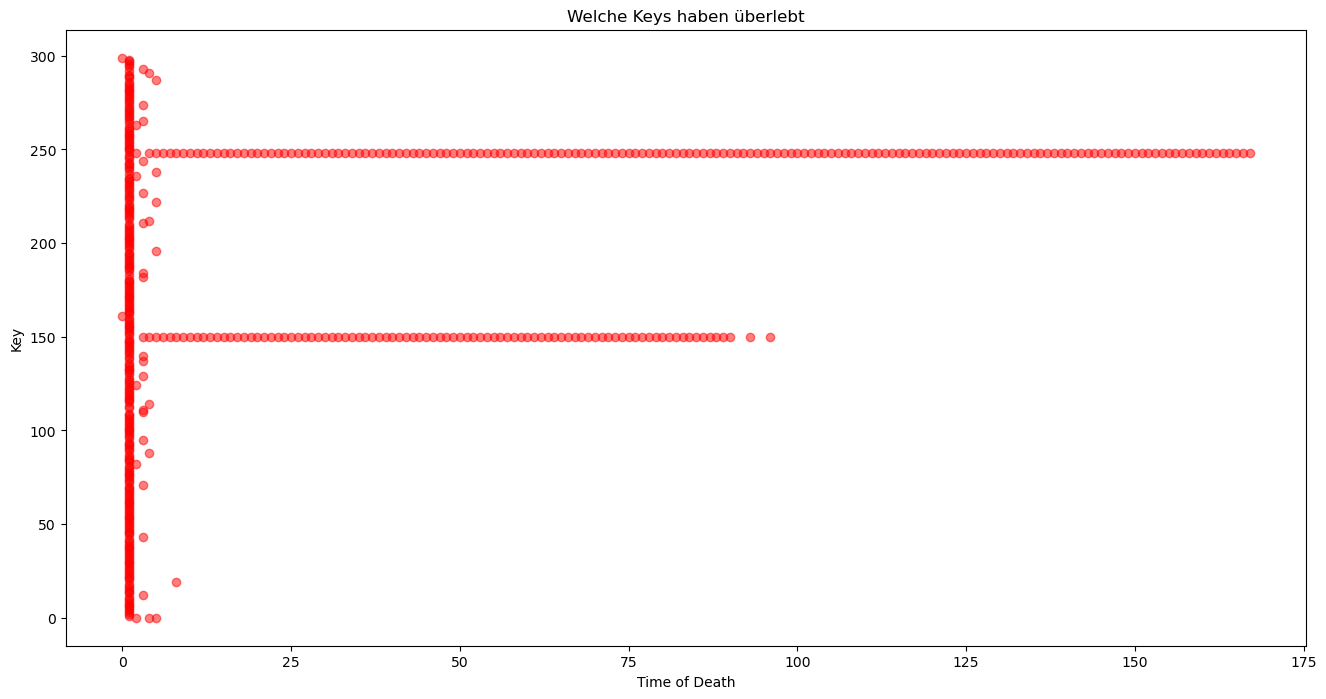

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

test1 = "5-32-2"
df = pd.read_csv(test1 + ".csv").fillna(0)

#df = df[df['eatenTrees'] >= 4]

print("\nMax Eaten Trees:")
print(df["eatenTrees"].max())

max_eaten_trees = df.groupby("timeOfDeath")['eatenTrees'].max().reset_index()
mean_eaten_trees = df.groupby("timeOfDeath")['eatenTrees'].mean().reset_index()

# Den Scatter-Plot erstellen
plt.figure(figsize=(16, 8))
plt.plot(max_eaten_trees["timeOfDeath"], max_eaten_trees['eatenTrees'], alpha=0.5, color="red", label="max")
plt.plot(mean_eaten_trees["timeOfDeath"], mean_eaten_trees['eatenTrees'], alpha=1, label="mean")
plt.title('Anzahl der gegessenen Bäume')
plt.xlabel('Time of Death')
plt.ylabel('Anzahl der gegessenen Bäume')
plt.grid(True)
plt.legend(loc='upper left')
plt.show()


keys = df.groupby("timeOfDeath")['key'].value_counts().reset_index(name='count')
plt.figure(figsize=(16, 8))
plt.scatter(keys["timeOfDeath"], keys['key'], alpha=0.5, color="red", label="max")
plt.title('Welche Keys haben überlebt')
plt.xlabel('Time of Death')
plt.ylabel('Key')
plt.show
